In [4]:
import torch 
from torch_geometric.datasets import ZINC
from torch_geometric.loader import DataLoader

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
def get_zinc_dataset(root='../data/ZINC', batch_size=64):
    """
    Loads the ZINC dataset from the specified root directory.
    
    Args:
        root (str): Path to the dataset folder.
        batch_size (int): Batch size for DataLoader.
    
    Returns:
        (DataLoader, DataLoader, DataLoader): train, val, and test loaders.
    """
    train_dataset = ZINC(root, split='train', subset=True)
    val_dataset = ZINC(root, split='val', subset=True)
    test_dataset = ZINC(root, split='test', subset=True)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader

# Now, let's load the dataset:
train_loader, val_loader, test_loader = get_zinc_dataset(batch_size=8)  # smaller batch size for exploration


In [10]:
batch = next(iter(train_loader))

print(batch)

DataBatch(x=[183, 1], edge_index=[2, 400], edge_attr=[400], y=[8], batch=[183], ptr=[9])


In [15]:
print("Node feature matrix shape:", batch.x.shape)
print("Edge index shape:", batch.edge_index.shape)
print("Batch vector shape:", batch.batch.shape)
print("Labels shape:", batch.y.shape)

# Optionally:
print("Number of graphs in this batch:", batch.num_graphs)


Node feature matrix shape: torch.Size([183, 1])
Edge index shape: torch.Size([2, 400])
Batch vector shape: torch.Size([183])
Labels shape: torch.Size([8])
Number of graphs in this batch: 8


In [18]:
print("Sample node features:\n", batch.x[:5])
print("Sample edges:\n", batch.edge_index[:, :10].t())  # first 10 edges
print("Sample labels:\n", batch.y[:5])


Sample node features:
 tensor([[0],
        [0],
        [1],
        [0],
        [0]])
Sample edges:
 tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 3,  2],
        [ 3,  4],
        [ 3, 26],
        [ 4,  3],
        [ 4,  5]])
Sample labels:
 tensor([ 9.6740e-01, -1.4094e-03, -2.0783e+01,  2.0319e-01,  1.8119e+00])


In [19]:
train_dataset = train_loader.dataset
print("Total graphs in train dataset:", len(train_dataset))

Total graphs in train dataset: 10000


# manual dataloader

In [20]:
dataset = ZINC(root='../data/ZINC', subset=True)

In [23]:
len(dataset)

10000

In [25]:
import numpy as np
from torch_geometric.data import Batch

def my_manual_data_loader(dataset, batch_size, shuffle=True):
    indicies = list(range(len(dataset)))

    if shuffle:
        np.random.shuffle(indicies)

    for start in range(0, len(indicies), batch_size):
        end = start + batch_size
        batch_indicies = indicies[start:end]

        batch_data_list = [dataset[i] for i in batch_indicies]
        yield Batch.from_data_list(batch_data_list)

In [27]:
batch_size = 4
loader = my_manual_data_loader(dataset, batch_size=2, shuffle=True)

first_batch = next(loader)
first_batch

DataBatch(x=[44, 1], edge_index=[2, 98], edge_attr=[98], y=[2], batch=[44], ptr=[3])

In [28]:
first_batch

DataBatch(x=[44, 1], edge_index=[2, 98], edge_attr=[98], y=[2], batch=[44], ptr=[3])

In [29]:
first_batch[0]

Data(x=[21, 1], edge_index=[2, 46], edge_attr=[46], y=[1])

In [30]:
first_batch[1]

Data(x=[23, 1], edge_index=[2, 52], edge_attr=[52], y=[1])

In [33]:
first_batch.edge_attr

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2,
        2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
        2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2,
        1, 2])

In [34]:
print("Node feature shape:", first_batch.x.shape)
print("Edge index shape:", first_batch.edge_index.shape)
print("Batch vector shape:", first_batch.batch.shape)
print("Labels shape:", first_batch.y.shape)
print("Number of graphs in batch:", first_batch.num_graphs)


Node feature shape: torch.Size([44, 1])
Edge index shape: torch.Size([2, 98])
Batch vector shape: torch.Size([44])
Labels shape: torch.Size([2])
Number of graphs in batch: 2


In [36]:
for i, batch in enumerate(my_manual_data_loader(dataset, batch_size=4, shuffle=True)):
    print(f"Batch {i+1}")
    print(f"  x shape:         {batch.x.shape}")
    print(f"  edge_index shape:{batch.edge_index.shape}")
    print(f"  y shape:         {batch.y.shape}")
    print(f"  num graphs:      {batch.num_graphs}")
    print(f"  batch:      {batch.batch}")

    # We'll just look at a few batches and break
    if i == 2:
        break


Batch 1
  x shape:         torch.Size([105, 1])
  edge_index shape:torch.Size([2, 224])
  y shape:         torch.Size([4])
  num graphs:      4
  batch:      tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3])
Batch 2
  x shape:         torch.Size([110, 1])
  edge_index shape:torch.Size([2, 238])
  y shape:         torch.Size([4])
  num graphs:      4
  batch:      tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        

In [61]:
data = dataset[3]
print(data)

Data(x=[27, 1], edge_index=[2, 60], edge_attr=[60], y=[1])


In [40]:
for i in range(5):
    d = dataset[i]
    print(f"--- Molecule {i} ---")
    print(f"Nodes: {d.num_nodes}, Edges: {d.num_edges}, Label: {d.y.item():.4f}")


--- Molecule 0 ---
Nodes: 29, Edges: 64, Label: 0.8350
--- Molecule 1 ---
Nodes: 26, Edges: 56, Label: -2.1935
--- Molecule 2 ---
Nodes: 16, Edges: 34, Label: 1.8422
--- Molecule 3 ---
Nodes: 27, Edges: 60, Label: -0.7115
--- Molecule 4 ---
Nodes: 21, Edges: 44, Label: 0.2463


In [41]:
num_nodes_list = []
num_edges_list = []

for d in dataset:
    num_nodes_list.append(d.num_nodes)
    num_edges_list.append(d.num_edges)

print(f"Min nodes : {min(num_nodes_list)}, Max nodes : {max(num_nodes_list)}")
print(f"Avg nodes : {sum(num_nodes_list)/len(num_nodes_list):.2f}")
print(f"Min edges: {min(num_edges_list)}, Max edges: {max(num_edges_list)}")
print(f"Avg edges: {sum(num_edges_list)/len(num_edges_list):.2f}")

Min nodes : 9, Max nodes : 37
Avg nodes : 23.17
Min edges: 16, Max edges: 82
Avg edges: 49.86


In [44]:
data

Data(x=[29, 1], edge_index=[2, 64], edge_attr=[64], y=[1])

In [46]:
data.edge_attr

tensor([1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2])

In [45]:
data.edge_index

tensor([[ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  8,
          8,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 15, 15,
         16, 16, 16, 16, 17, 18, 19, 19, 19, 20, 20, 21, 21, 21, 22, 23, 23, 24,
         24, 25, 25, 26, 26, 27, 27, 27, 28, 28],
        [ 1,  0,  2,  1,  3, 28,  2,  4,  3,  5,  4,  6, 27,  5,  7,  6,  8,  7,
          9, 10,  8,  8, 11, 27, 10, 12, 11, 13, 26, 12, 14, 13, 15, 14, 16, 25,
         15, 17, 18, 19, 16, 16, 16, 20, 24, 19, 21, 20, 22, 23, 21, 21, 24, 19,
         23, 15, 26, 12, 25,  5, 10, 28,  2, 27]])

In [59]:
data.edge_index.t()

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 28],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 5,  4],
        [ 5,  6],
        [ 5, 27],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 8,  7],
        [ 8,  9],
        [ 8, 10],
        [ 9,  8],
        [10,  8],
        [10, 11],
        [10, 27],
        [11, 10],
        [11, 12],
        [12, 11],
        [12, 13],
        [12, 26],
        [13, 12],
        [13, 14],
        [14, 13],
        [14, 15],
        [15, 14],
        [15, 16],
        [15, 25],
        [16, 15],
        [16, 17],
        [16, 18],
        [16, 19],
        [17, 16],
        [18, 16],
        [19, 16],
        [19, 20],
        [19, 24],
        [20, 19],
        [20, 21],
        [21, 20],
        [21, 22],
        [21, 23],
        [22, 21],
        [23, 21],
        [23, 24],
        [24, 19],
        [24, 23],
        [2

In [42]:
data.x

tensor([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [2],
        [0],
        [0],
        [2],
        [5],
        [1],
        [1],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])

In [43]:
data.y

tensor([0.8350])

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)

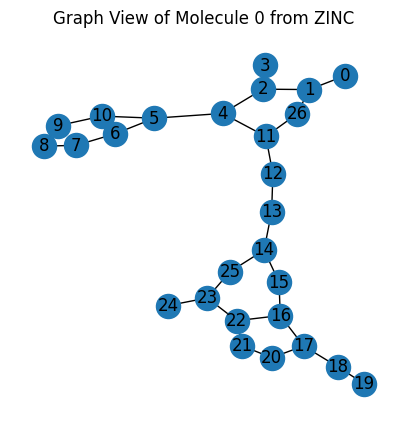

In [68]:
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, with_labels=True)
plt.title("Graph View of Molecule 0 from ZINC")
plt.axis('off')
plt.show()

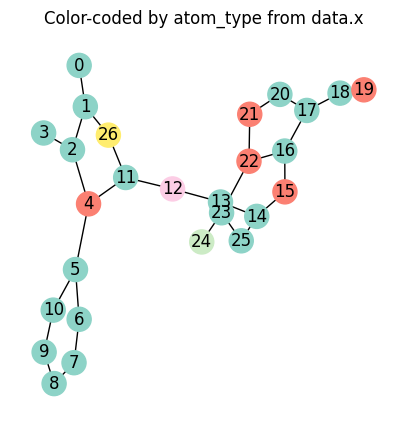

In [78]:
node_color = [atom_type.item() for atom_type in data.x[:, 0]]

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, seed=42)  # deterministic layout
nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap='Set3')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("Color-coded by atom_type from data.x")
plt.axis('off')
plt.show()


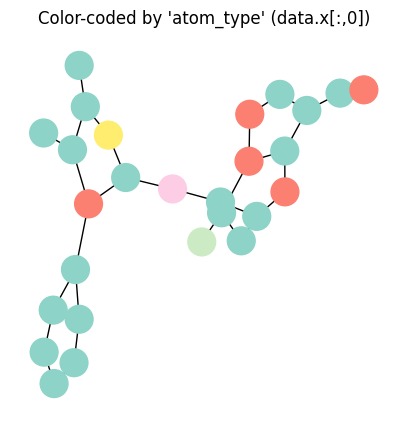

In [109]:
G = nx.Graph()

num_nodes = data.num_nodes

for node in range(num_nodes):
    atom_type = data.x[node, 0].item()
    G.add_node(node, atom_type=atom_type)

edge_index = data.edge_index
edge_attr = data.edge_attr

for edge in range(data.edge_index.shape[1]):
    src = edge_index[0,edge].item()
    dst = edge_index[1,edge].item()

    bond_type = data.edge_attr[i].item()
    G.add_edge(src, dst, bond_type=bond_type)

pos = nx.spring_layout(G, seed=42)

node_color = []
for node in G.nodes:
    atom_type = G.nodes[node]['atom_type']
    node_color.append(atom_type)

plt.figure(figsize=(5, 5))
# Draw nodes
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_color,
    cmap='Set3',            # You can choose another colormap
    node_size=400,
)
nx.draw_networkx_edges(G, pos)
plt.title("Color-coded by 'atom_type' (data.x[:,0])")
plt.axis('off')
plt.show()



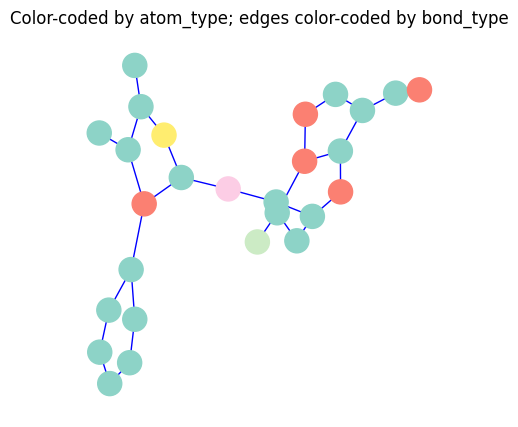

In [118]:
bond_color_map = {1: 'black', 2: 'blue', 3: 'green', 4: 'red'}

edge_colors = []
for (src, dst) in G.edges():
    bond_type = G[src][dst].get('bond_type', 1)  # default 1 if missing
    edge_colors.append(bond_color_map.get(bond_type, 'gray'))

plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_color,
    cmap='Set3',
    node_size=300,
)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
labels = {n: f"{G.nodes[n]['atom_type']}" for n in G.nodes()}
# nx.draw_networkx_labels(G, pos, labels=labels)
plt.title("Color-coded by atom_type; edges color-coded by bond_type")
plt.axis("off")
plt.show()

In [120]:
data.edge_attr

tensor([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 2, 2,
        1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2])

In [124]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_molecule(data, molecule_number=1):
    """
    Plot a PyG 'Data' object (like a single ZINC molecule) with:
      - Nodes colored by atom_type (data.x)
      - Edges colored by bond_type (data.edge_attr)
      - No text labels
      - Title: "Molecule #<molecule_number>"

    Args:
        data (torch_geometric.data.Data): The molecule graph data.
        molecule_number (int): Identifier to show in the plot title.
    """
    # 1. Create a NetworkX graph
    G = nx.Graph()
    
    # 2. Add nodes (color-coded by data.x)
    #    data.x is shape [num_nodes, 1] => integer-coded atom types
    num_nodes = data.num_nodes
    for node_id in range(num_nodes):
        atom_type = data.x[node_id, 0].item()  # or node_id if you prefer
        G.add_node(node_id, atom_type=atom_type)
        
    # 3. Add edges
    #    data.edge_attr might store bond type (1=single, 2=double, etc.)
    edge_index = data.edge_index
    edge_attr = data.edge_attr if hasattr(data, 'edge_attr') else None
    
    num_edges = edge_index.size(1)
    for i in range(num_edges):
        src = edge_index[0, i].item()
        dst = edge_index[1, i].item()
        bond_type = None
        if edge_attr is not None:
            bond_type = edge_attr[i].item()
        G.add_edge(src, dst, bond_type=bond_type)
    
    # 4. Node color mapping
    #    We'll just use the raw atom_type value as the color input.
    #    You can also offset or scale these if you want nicer color separation.
    node_color = [G.nodes[node_id]['atom_type'] for node_id in G.nodes()]
    
    # 5. Edge color mapping
    #    We'll assume bond_type in {1,2,3,4} => {single, double, triple, aromatic}.
    #    If bond_type is outside this set, we'll default to gray.
    bond_color_map = {1: 'black', 2: 'blue', 3: 'green', 4: 'red'}
    edge_colors = []
    for (u, v) in G.edges():
        bt = G[u][v]['bond_type']
        edge_colors.append(bond_color_map.get(bt, 'gray'))
    
    # 6. Get a layout for plotting
    pos = nx.spring_layout(G, seed=42)  # deterministic layout for consistent plots
    
    # 7. Plot
    plt.figure(figsize=(5, 5))
    
    # 7.1 Draw nodes (no labels, just color)
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_color,
        cmap='Set3',         # discrete colormap with pastel shades
        node_size=400,
    )
    
    # 7.2 Draw edges
    nx.draw_networkx_edges(
        G, pos,
        edge_color=edge_colors,
        width=2.0,
    )
    
    # (No nx.draw_networkx_labels call => no text on the nodes)
    
    # 8. Title and final formatting
    plt.title(f"Molecule #{molecule_number}")
    plt.axis('off')
    plt.show()


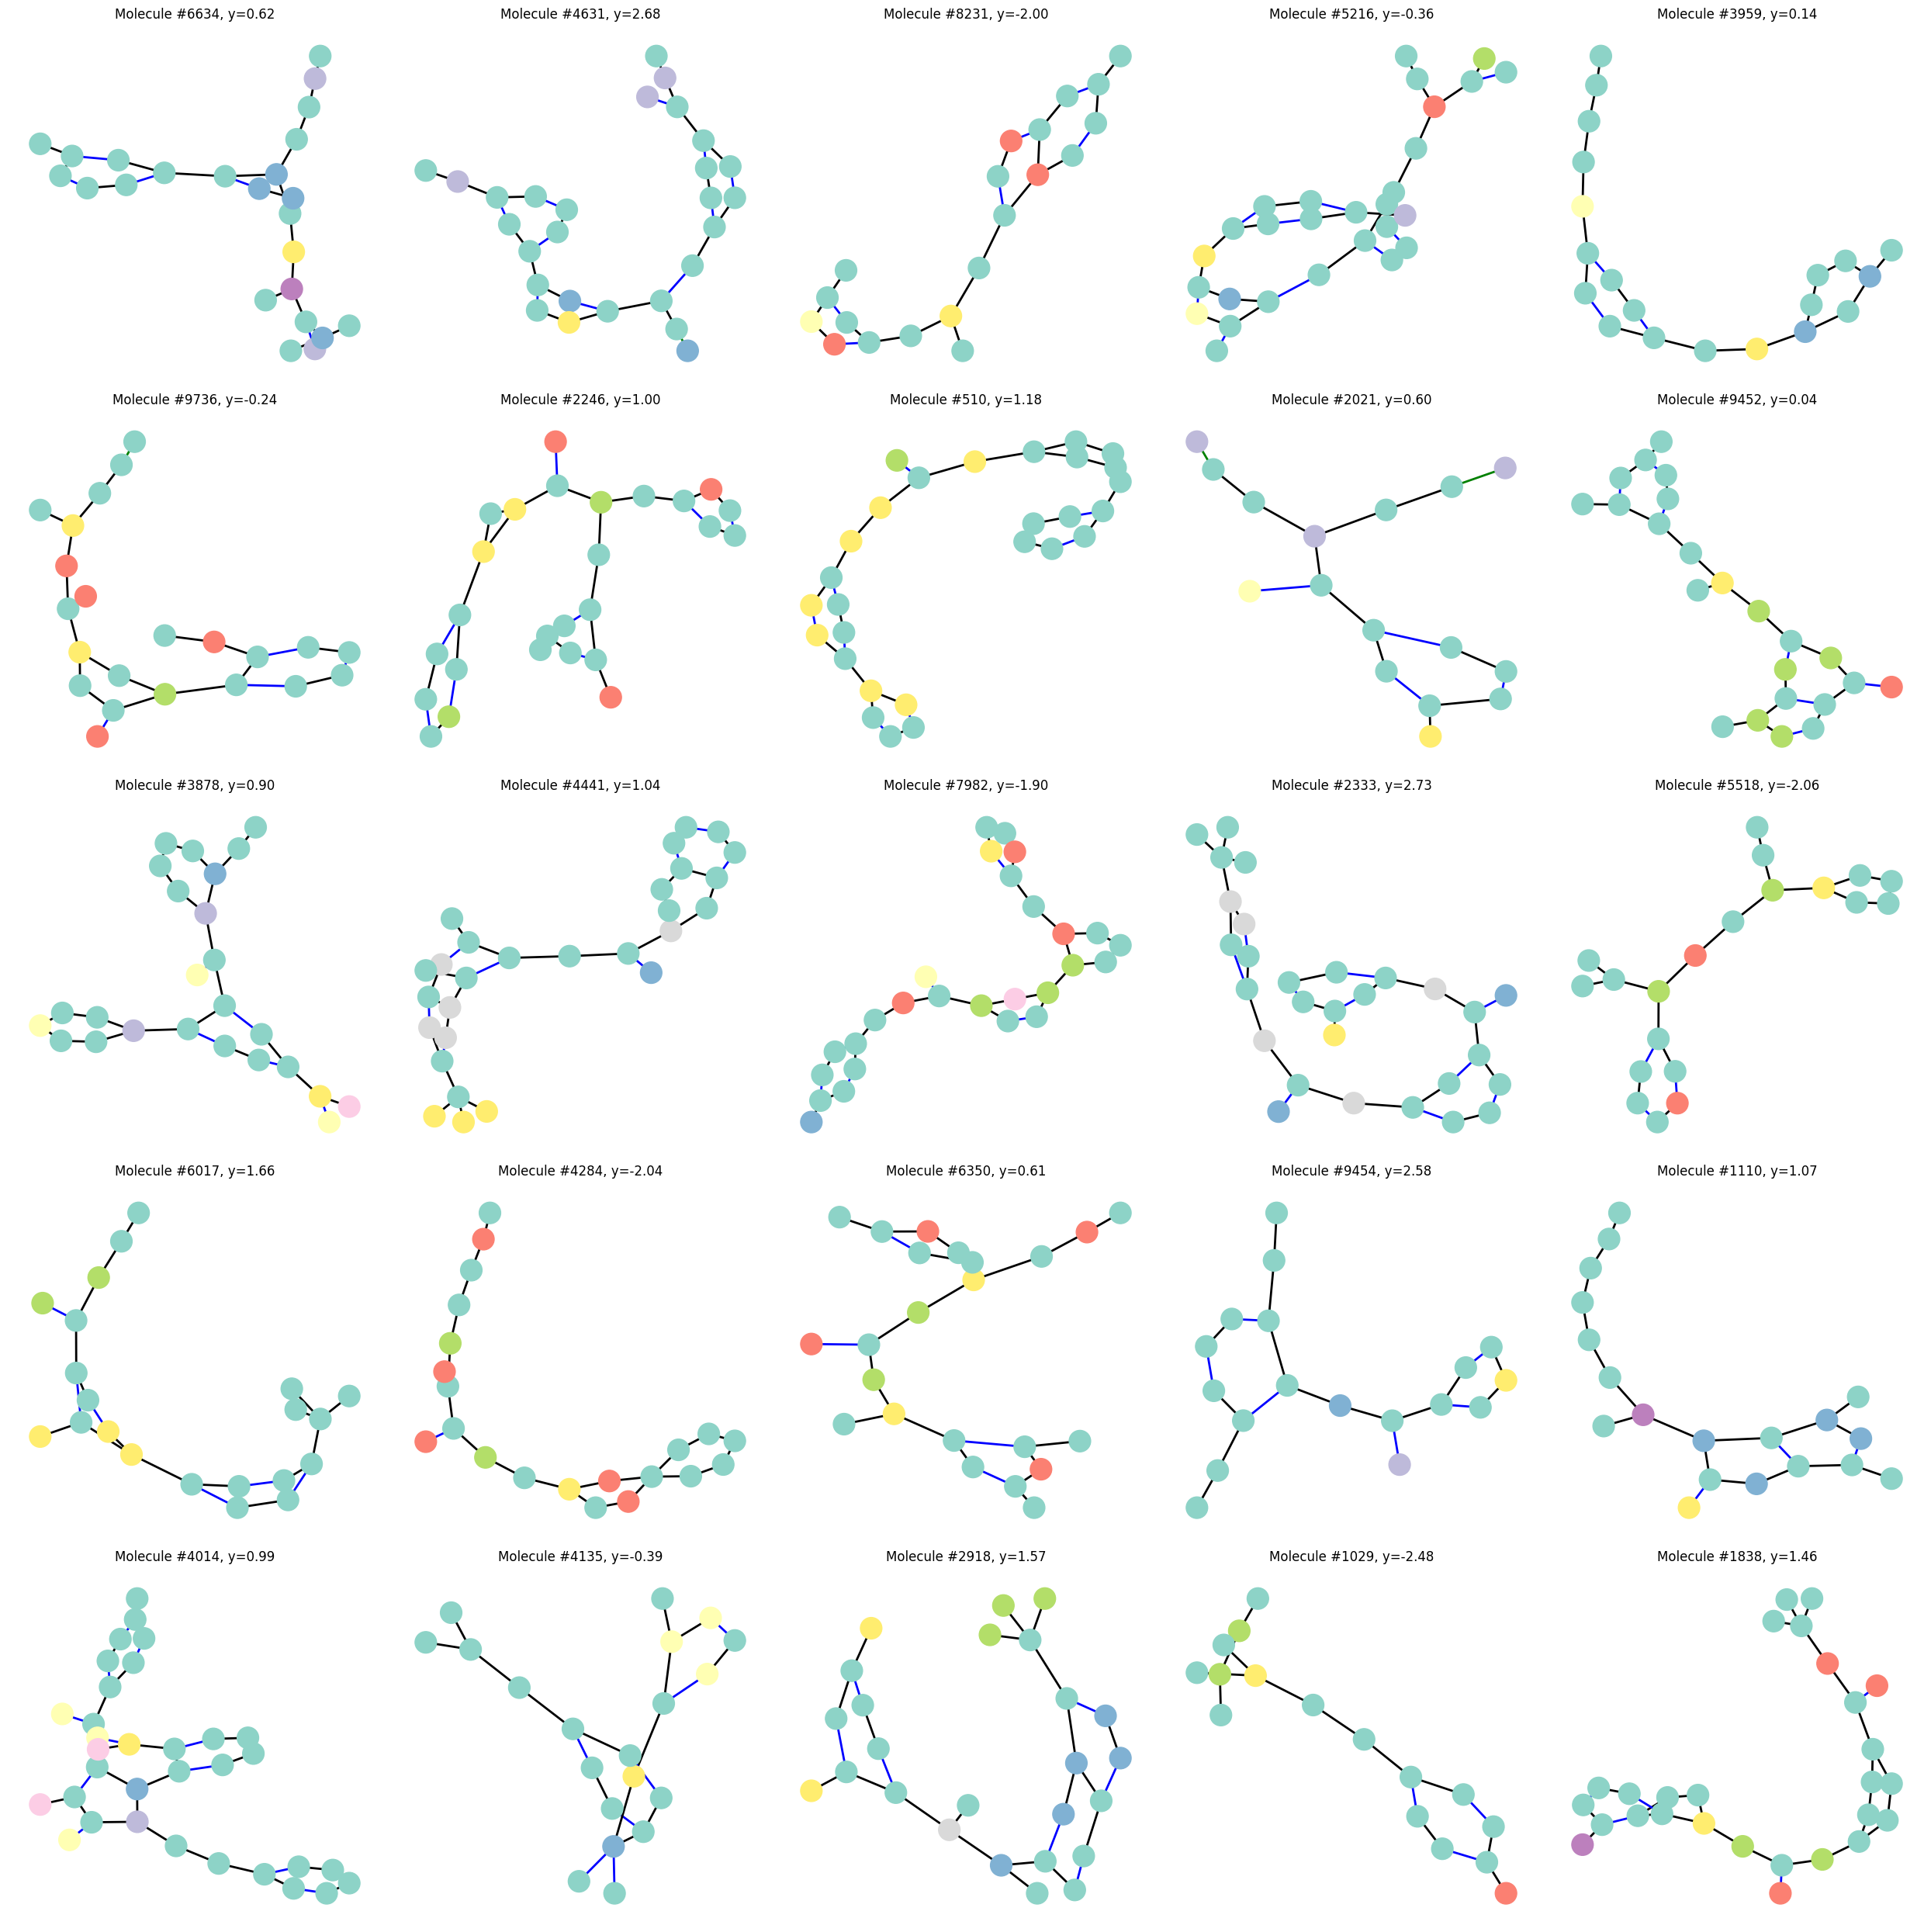

In [382]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import ZINC

# 1. Load dataset
dataset = ZINC(root='../data/ZINC', split='train', subset=True)

# 2. Randomly pick 25 distinct molecule indices
random_ids = random.sample(range(len(dataset)), 25)

# 3. Create a 5x5 figure grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))
axes = axes.flatten()  # make iteration easier

for i, ax in enumerate(axes):
    mol_idx = random_ids[i]
    data = dataset[mol_idx]

    # ----- Build a NetworkX graph from this molecule -----
    G = nx.Graph()

    # Add nodes (store atom_type as an attribute)
    for node_id in range(data.num_nodes):
        atom_type = data.x[node_id, 0].item()
        G.add_node(node_id, atom_type=atom_type)

    # Add edges (store bond_type if present)
    edge_index = data.edge_index
    edge_attr = data.edge_attr if 'edge_attr' in data else None

    for j in range(edge_index.size(1)):
        src = edge_index[0, j].item()
        dst = edge_index[1, j].item()
        bond_type = None
        if edge_attr is not None:
            bond_type = edge_attr[j].item()
        G.add_edge(src, dst, bond_type=bond_type)

    # ----- Node & Edge colors -----
    # Node color by atom_type
    node_color = [G.nodes[n]['atom_type'] for n in G.nodes()]

    # Edge color by bond_type (1=black, 2=blue, 3=green, 4=red)
    bond_color_map = {1: 'black', 2: 'blue', 3: 'green', 4: 'red'}
    edge_colors = []
    for (u, v) in G.edges():
        bt = G[u][v]['bond_type']
        edge_colors.append(bond_color_map.get(bt, 'gray'))

    # ----- Draw on this subplot (ax) -----
    pos = nx.spring_layout(G, seed=42)  # deterministic layout
    nx.draw_networkx_nodes(G, pos, 
                           node_color=node_color, 
                           cmap='Set3',
                           node_size=400, 
                           ax=ax)
    nx.draw_networkx_edges(G, pos, 
                           edge_color=edge_colors,
                           width=2.0, 
                           ax=ax)

    ax.axis("off")

    # Title includes molecule index & y value
    # (Assuming a single scalar y. If multiple, adjust accordingly)
    y_val = float(data.y.item()) if data.y.numel() == 1 else data.y.tolist()
    ax.set_title(f"Molecule #{mol_idx}, y={y_val:.2f}")

plt.tight_layout()
plt.savefig("../images/molecule_grid.pdf", dpi=300)
plt.show()



> We visualize selected molecules from the ZINC dataset, represented as graph structures where each node corresponds to an atom and each edge corresponds to a chemical bond. The integer-coded feature $\mathbf{x}_{i}$ for node $i$ is assumed to encode the atom’s type (e.g., atomic number), following the data preprocessing provided by PyTorch Geometric (PyG). Node colors in the figure thus reflect these integer codes: nodes with distinct atom types receive distinct colors from a discrete colormap. For bond information, we rely on the $\texttt{edge\_attr}$ field in the dataset, which appears to store an integer-coded “bond type” (commonly interpreted as 1 = single, 2 = double, 3 = triple, and 4 = aromatic), enabling edge color-coding based on these categories. We note that this integer encoding of atom and bond types originates from the preprocessed ZINC pickle files distributed alongside PyG. As such, while we infer that these codes align with standard atomic numbers and commonly recognized bond orders, the exact mapping is not fully documented within the PyG repository. Consequently, the final atom-type and bond-type assignments should be interpreted with the understanding that they were determined by external RDKit-based scripts prior to integration into PyG.

In [192]:
loader = DataLoader(dataset, batch_size=10, shuffle=False)

batch=next(iter(loader))
batch

DataBatch(x=[222, 1], edge_index=[2, 472], edge_attr=[472], y=[10], batch=[222], ptr=[11])

In [139]:
batch.batch

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1])

In [146]:
all(batch.x[batch.batch == 1] == dataset[1].x)

True

In [157]:
# Get the nodes that belong to batch 1
nodes_in_batch_1 = (batch.batch == 1).nonzero(as_tuple=True)[0]

# Create a mask for edges where both source and target nodes are in batch 1
edge_mask = torch.isin(batch.edge_index[0], nodes_in_batch_1) & torch.isin(batch.edge_index[1], nodes_in_batch_1)

# Apply the mask to edge_index
filtered_edge_index = batch.edge_index[:, edge_mask]
filtered_edge_index

tensor([[29, 30, 30, 30, 31, 32, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 36, 37,
         38, 38, 38, 39, 39, 40, 40, 41, 41, 41, 42, 42, 42, 43, 44, 44, 44, 45,
         45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 52, 53, 53,
         54, 54],
        [30, 29, 31, 32, 30, 30, 33, 52, 32, 34, 33, 35, 34, 36, 35, 37, 38, 36,
         36, 39, 51, 38, 40, 39, 41, 40, 42, 50, 41, 43, 44, 42, 42, 45, 49, 44,
         46, 45, 47, 46, 48, 47, 49, 44, 48, 41, 51, 38, 50, 32, 53, 54, 52, 54,
         52, 53]])

In [161]:
filtered_edge_index.T

tensor([[29, 30],
        [30, 29],
        [30, 31],
        [30, 32],
        [31, 30],
        [32, 30],
        [32, 33],
        [32, 52],
        [33, 32],
        [33, 34],
        [34, 33],
        [34, 35],
        [35, 34],
        [35, 36],
        [36, 35],
        [36, 37],
        [36, 38],
        [37, 36],
        [38, 36],
        [38, 39],
        [38, 51],
        [39, 38],
        [39, 40],
        [40, 39],
        [40, 41],
        [41, 40],
        [41, 42],
        [41, 50],
        [42, 41],
        [42, 43],
        [42, 44],
        [43, 42],
        [44, 42],
        [44, 45],
        [44, 49],
        [45, 44],
        [45, 46],
        [46, 45],
        [46, 47],
        [47, 46],
        [47, 48],
        [48, 47],
        [48, 49],
        [49, 44],
        [49, 48],
        [50, 41],
        [50, 51],
        [51, 38],
        [51, 50],
        [52, 32],
        [52, 53],
        [52, 54],
        [53, 52],
        [53, 54],
        [54, 52],
        [5

In [166]:
loader = DataLoader(dataset, batch_size=4, shuffle=True)

batch = next(iter(loader))
print(batch)

DataBatch(x=[90, 1], edge_index=[2, 192], edge_attr=[192], y=[4], batch=[90], ptr=[5])


In [168]:
print(batch)

DataBatch(x=[90, 1], edge_index=[2, 192], edge_attr=[192], y=[4], batch=[90], ptr=[5])


In [170]:
data.edge_index

tensor([[ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  7,
          8,  9,  9, 10, 10, 11, 11, 11, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16,
         17, 17, 17, 18, 18, 18, 19, 20, 21, 21, 22, 22, 23, 23],
        [ 1,  0,  2,  1,  3, 23,  2,  4,  3,  5,  4,  6, 22,  5,  7,  6,  8,  9,
          7,  7, 10,  9, 11, 10, 12, 13, 11, 11, 14, 21, 13, 15, 14, 16, 15, 17,
         16, 18, 21, 17, 19, 20, 18, 18, 13, 17,  5, 23,  2, 22]])

In [171]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class SimpleGCN(nn.Module):
    def __init__(self, in_channels, hidden_dim, out_channels):
        super().__init__()

        self.conv1 = GCNConv(in_channels, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.lin = nn.Linear(hidden_dim, 1)


    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x=self.conv2(x, edge_index)
        x=F.relu(x)

        x = global_mean_pool(x, batch)

        x=self.lin(x)
        return x

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_mean_pool

class GINEBondModel(nn.Module):
    def __init__(self, in_channels, edge_dim, hidden_dim=64, out_channels=1):
        super().__init__()
        
        # MLP shared by both GINEConv layers:
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        
        # Two GINEConv layers that use the same or similar MLP
        #   The `train_eps=True` means we learn an epsilon parameter for GIN-type skip connections
        self.conv1 = GINEConv(nn=self.mlp, train_eps=True, edge_dim=edge_dim)
        self.conv2 = GINEConv(nn=self.mlp, train_eps=True, edge_dim=edge_dim)
        
        # Final linear output layer
        self.lin = nn.Linear(hidden_dim, out_channels)

    def forward(self, x, edge_index, edge_attr, batch):
        """
        x: [num_nodes, in_channels]
        edge_index: [2, num_edges]
        edge_attr: [num_edges, edge_dim]  # one-hot or any numeric representation of bonds
        batch: [num_nodes] indicating the graph ID per node
        """
        
        # First GINEConv layer
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        
        # Second GINEConv layer
        x = self.conv2(x, edge_index, edge_attr)
        x = F.relu(x)
        
        # Global pooling => one embedding per graph
        x = global_mean_pool(x, batch)
        
        # Final linear => shape [num_graphs_in_batch, out_channels]
        return self.lin(x)


In [376]:
# Load the small subset (train set)
train_dataset = ZINC(root='../data/ZINC', split='train', subset=True)

# Create a loader with a small batch size => let's do 4 for demonstration
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Grab one batch
batch = next(iter(train_loader))
print("Batch:", batch)
print("  x shape:", batch.x.shape)
print("  edge_index shape:", batch.edge_index.shape)
print("  y shape:", batch.y.shape)
print("  batch vector shape:", batch.batch.shape)

Batch: DataBatch(x=[1445, 1], edge_index=[2, 3116], edge_attr=[3116], y=[64], batch=[1445], ptr=[65])
  x shape: torch.Size([1445, 1])
  edge_index shape: torch.Size([2, 3116])
  y shape: torch.Size([64])
  batch vector shape: torch.Size([1445])


In [377]:
batch.x

tensor([[0],
        [0],
        [2],
        ...,
        [0],
        [1],
        [0]])

In [182]:
in_channels = batch.x.shape[1]
hidden_dim = 32
out_channels = 1

model = SimpleGCN(in_channels, hidden_dim, out_channels)
out = model(batch.x.float(), batch.edge_index, batch.batch)
out

tensor([[-0.0356],
        [-0.0353],
        [-0.0259],
        [-0.0366]], grad_fn=<AddmmBackward0>)

In [188]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_mean_pool

class GINEBondModel(nn.Module):
    def __init__(self, in_channels, edge_dim, hidden_dim=64, out_channels=1):
        super().__init__()
        
        # MLP for the first GINEConv (node input dimension = in_channels)
        self.mlp1 = nn.Sequential(
            nn.Linear(in_channels, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )
        
        # MLP for the second GINEConv (node input dimension = hidden_dim)
        self.mlp2 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )
        
        self.conv1 = GINEConv(nn=self.mlp1, train_eps=True, edge_dim=edge_dim)
        self.conv2 = GINEConv(nn=self.mlp2, train_eps=True, edge_dim=edge_dim)
        
        self.lin = nn.Linear(hidden_dim, out_channels)

    def forward(self, x, edge_index, edge_attr, batch):
        # First GINEConv layer
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)

        # Second GINEConv layer
        x = self.conv2(x, edge_index, edge_attr)
        x = F.relu(x)

        # Global pooling => one embedding per graph
        x = global_mean_pool(x, batch)

        return self.lin(x)


In [184]:
import torch

def bond_type_one_hot(edge_attr, num_bond_types=4):
    """
    Convert integer-coded bond types into a one-hot vector.
    Example: If edge_attr[i] = 2 (double bond), 
    then one-hot is [0,1,0,0].

    Args:
        edge_attr (Tensor): shape [num_edges], each entry in {1,2,3,4}
        num_bond_types (int): how many distinct bond types we expect

    Returns:
        one_hot (Tensor): shape [num_edges, num_bond_types]
    """
    num_edges = edge_attr.size(0)
    one_hot = torch.zeros((num_edges, num_bond_types), dtype=torch.float, device=edge_attr.device)
    # Subtract 1 to make 1→0, 2→1, etc.
    valid_mask = (edge_attr >= 1) & (edge_attr <= num_bond_types)
    # Safely place 1.0 at the correct positions
    one_hot[torch.arange(num_edges)[valid_mask], edge_attr[valid_mask] - 1] = 1.0
    return one_hot


In [189]:
import torch
from torch_geometric.datasets import ZINC
from torch_geometric.loader import DataLoader

# A) Load the ZINC dataset
train_dataset = ZINC(root='../data/ZINC', split='train', subset=True)
loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# B) Grab one batch
batch = next(iter(loader))
print("batch.edge_attr:", batch.edge_attr)

# C) Convert edge_attr to one-hot
#    ZINC typically has integer bond types in {1,2,3,4}
edge_feat = bond_type_one_hot(batch.edge_attr, num_bond_types=4)

print("edge_feat shape:", edge_feat.shape)  # expect [num_edges, 4]

# D) Build & test the GINEBondModel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GINEBondModel(
    in_channels=batch.x.size(1), 
    edge_dim=4,                 # we used 4 bond categories
    hidden_dim=32, 
    out_channels=1
).to(device)

# Move batch data to device
batch = batch.to(device)
edge_feat = edge_feat.to(device)

# E) Single forward pass
out = model(batch.x.float(), batch.edge_index, edge_feat, batch.batch)
print("GINEBondModel output shape:", out.shape)
print("Example predictions:", out)


batch.edge_attr: tensor([1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
        1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
        2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
        2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2])
edge_feat shape: torch.Size([192, 4])
GINEBondModel output shape: torch.Size([4, 1])
Example predictions: tensor([[0.1822],
        [0.1898],
        [0.1863],
        [0.1836]], grad_fn=<AddmmBackward0>)


In [190]:
edge_feat

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0.,

## Manual

In [ ]:
num_nodes = 222 

In [211]:
dim = len(batch.x)
A = np.zeros((dim, dim), dtype=np.float32)
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(222, 222), dtype=float32)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(222, 222), dtype=float32)

### 2. Build the (Sparse) Adjacency Matrix

In [215]:
# 2. Build the (Sparse) Adjacency Matrix

# Step 2.2: Fill adjacency from edge_index
# edge_index[0, i] => source
# edge_index[1, i] => target

dim = len(batch.x)
A = np.zeros((dim, dim), dtype=np.float32)
A

for i in range(batch.edge_index.size(1)):
    src = batch.edge_index[0, i].item()
    dst = batch.edge_index[1, i].item()
    A[src, dst] = 1.0
    A[dst, src] = 1.0  # und

# Step 2.3: Add self-loops ??? each node with itslef 
for i in range(dim):
    A[i, i] = 1.0

print("Adjacency matrix shape:", A.shape)
print("Number of non-zeros in A:", np.count_nonzero(A))

Adjacency matrix shape: (222, 222)
Number of non-zeros in A: 694


### 3. Compute the Normalized Adjacency $\widetilde{D}^{-1 / 2} \widetilde{A} \widetilde{D}^{-1 / 2}$

In [273]:
# Step 3.1: Node degrees
degrees = A.sum(axis=1)  # sum of each row
# Step 3.2: Inverse sqrt of degrees
inv_sqrt_deg = 1.0 / np.sqrt(degrees + 1e-8)  # avoid divide by zero
# Step 3.3: Build the diagonal
D_inv_sqrt = np.diag(inv_sqrt_deg)
# Step 3.4: normalized adjacency
A_norm = D_inv_sqrt @ A @ D_inv_sqrt

### 4. First GCN Layer: $X^{\prime}=A_{\text {norm }} X W^{(1)}$

In [274]:
in_channels = batch.x.shape[1]  # 1
hidden_dim = 16

# Step 4.1: Initialize W^(1) randomly
W1 = np.random.randn(in_channels, hidden_dim).astype(np.float32) * 0.1

# Step 4.2: Compute XW1 => shape [222, 16]
XW1 = batch.x @ W1  # matrix multiply

# print("XW1 shape:", XW1.shape)
A_norm = torch.from_numpy(A_norm).to(torch.float)
XW1 = XW1.to(torch.float)
Z1 = A_norm @ XW1

print("Z1 shape:", Z1.shape)
print("Z1[0:5] (some sample):\n", Z1[0:5])

# Step 4.4: Apply ReLU
def relu(x):
    return np.maximum(0, x)

H1 = relu(Z1)
print("H1 shape after ReLU:", H1.shape)


Z1 shape: torch.Size([222, 16])
Z1[0:5] (some sample):
 tensor([[ 0.0413,  0.0411, -0.0287,  0.0382, -0.0211,  0.0354, -0.0110, -0.0372,
          0.0607,  0.0296, -0.0268, -0.0142, -0.1141,  0.0278, -0.0242,  0.0256],
        [ 0.0337,  0.0336, -0.0234,  0.0312, -0.0172,  0.0289, -0.0090, -0.0304,
          0.0496,  0.0241, -0.0219, -0.0116, -0.0931,  0.0227, -0.0197,  0.0209],
        [ 0.0292,  0.0291, -0.0203,  0.0270, -0.0149,  0.0250, -0.0078, -0.0263,
          0.0429,  0.0209, -0.0189, -0.0101, -0.0807,  0.0196, -0.0171,  0.0181],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])
H1 shape after ReLU: torch.Size([222, 16])


/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_88736/61221006.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  XW1 = batch.x @ W1  # matrix multiply
/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_88736/61221006.py:20: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.maximum(0, x)


In [276]:
# Step 5.1: Weight matrix for 2nd GCN layer
W2 = np.random.randn(hidden_dim, hidden_dim).astype(np.float32) * 0.1

# Step 5.2: XW2 => shape [222, 16]
XW2 = H1 @ W2

# Step 5.3: A_norm XW2 => shape [222, 16]
Z2 = A_norm @ XW2

# Step 5.4: ReLU again
H2 = relu(Z2)

print("H2 shape:", H2.shape)


H2 shape: torch.Size([222, 16])


/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_88736/3532453559.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  XW2 = H1 @ W2
/var/folders/p5/dn4spxsx2897rzdgf07vym2c0000gn/T/ipykernel_88736/61221006.py:20: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return np.maximum(0, x)


### 6. Global Mean Pool

In [288]:
num_graphs = batch.ptr.shape[0] - 1 
pooled = np.zeros((num_graphs, hidden_dim), dtype=np.float32)
counts = np.zeros(num_graphs, dtype=np.float32)


for node_idx in range(num_nodes):
    graph_idx = batch.batch[node_idx]
    pooled[graph_idx] += H2[node_idx].detach().cpu().numpy()
    counts[graph_idx] += 1

In [301]:
pooled[9]

array([0.42598936, 0.436395  , 0.2361806 , 0.        , 0.14668797,
       0.11695887, 0.        , 0.5356763 , 0.        , 0.14192517,
       1.1397349 , 0.        , 0.12344378, 0.        , 0.55074066,
       0.6997362 ], dtype=float32)

### 7. Final Linear Layer

In [302]:
out_channels = 1
W_out = np.random.randn(hidden_dim, out_channels).astype(np.float32) * 0.1

# Matrix multiply => shape [10, 1]
logits = pooled @ W_out
print("logits shape:", logits.shape)
print("logits:\n", logits)

logits shape: (10, 1)
logits:
 [[0.42258587]
 [0.48733434]
 [0.26030016]
 [0.71985203]
 [0.26065725]
 [0.6871001 ]
 [0.5288045 ]
 [0.2424371 ]
 [0.33881944]
 [0.43106136]]


### 8. Compute Loss (MSE)

In [307]:
batch.y.detach().cpu().numpy()

array([ 0.83503556, -2.1935492 ,  1.8422303 , -0.711533  ,  0.24634701,
        0.5229709 , -1.71725   , -0.4237148 ,  0.90199363,  1.1187779 ],
      dtype=float32)

In [308]:
pred = logits.ravel()  # shape [10]
mse = ((pred - batch.y.detach().cpu().numpy())**2).mean()
print("MSE:", mse)


MSE: 1.8214397


In [309]:
batch

DataBatch(x=[222, 1], edge_index=[2, 472], edge_attr=[472], y=[10], batch=[222], ptr=[11])

In [350]:
import numpy as np 

np.set_printoptions(precision=3, threshold=10, edgeitems=3, suppress=True)

# ----- FAKE DATA (replace with your real batch) -----
# num_nodes = 222
# num_graphs = 10
# edge_count = 472

# x: node features, shape [222, 1]
# x = np.random.rand(num_nodes, 1).astype(np.float32)
x = batch.x.detach().cpu().numpy()

# edge_index: shape [2, 472] (src, dst)
# edge_index = np.random.randint(low=0, high=num_nodes, size=(2, edge_count))
edge_index = batch.edge_index.detach().cpu().numpy()

# batch_array: which graph each node belongs to (0..9)
# batch_array = np.random.randint(low=0, high=num_graphs, size=num_nodes)
batch_array = batch.batch.detach().cpu().numpy()

# y: shape [10], a regression target for each graph
# y = np.random.rand(num_graphs).astype(np.float32)
y = batch.y.detach().cpu().numpy()

In [351]:
def build_normalized_adjacency(num_nodes, edge_index):
    A = np.zeros((num_nodes, num_nodes), dtype=np.float32)
    for i in range(edge_index.shape[1]):
        src = edge_index[0, i]
        dst = edge_index[1, i]
        A[src, dst] = 1.0
        A[dst, src] = 1.0  # undirected assumption
    # Self-loops
    for i in range(num_nodes):
        A[i, i] = 1.0
    # Degree normalization
    degrees = A.sum(axis=1) + 1e-8
    inv_sqrt_deg = 1.0 / np.sqrt(degrees)
    D_inv_sqrt = np.diag(inv_sqrt_deg)
    A_norm = D_inv_sqrt @ A @ D_inv_sqrt
    return A_norm

A_norm = build_normalized_adjacency(num_nodes, edge_index)


In [352]:
def relu(x):
    return np.maximum(0, x)

def global_mean_pool(H, batch_array, num_graphs):
    """
    H: [num_nodes, dim]
    batch_array: [num_nodes], each value 0..(num_graphs-1)
    Returns pooled: [num_graphs, dim]
    """
    dim = H.shape[1]
    pooled = np.zeros((num_graphs, dim), dtype=np.float32)
    counts = np.zeros(num_graphs, dtype=np.float32)

    for node_idx in range(H.shape[0]):
        g_idx = batch_array[node_idx]
        pooled[g_idx] += H[node_idx]
        counts[g_idx] += 1
    
    for g in range(num_graphs):
        if counts[g] > 0:
            pooled[g] /= counts[g]
    return pooled


In [353]:
def forward_gcn(x, A_norm, batch_array, W1, W2, W_out):
    """
    Returns (logits, cache) for backprop
    """
    # Layer1
    XW1 = x @ W1           # [222, hidden_dim]
    Z1 = A_norm @ XW1      # [222, hidden_dim]
    H1 = relu(Z1)          # [222, hidden_dim]

    # Layer2
    XW2 = H1 @ W2          # [222, hidden_dim]
    Z2 = A_norm @ XW2      # [222, hidden_dim]
    H2 = relu(Z2)          # [222, hidden_dim]

    # Global mean pool => [10, hidden_dim]
    pooled = global_mean_pool(H2, batch_array, num_graphs)

    # Final linear => shape [10, 1]
    logits_2d = pooled @ W_out  # [10, 1]
    logits = logits_2d.reshape(-1)  # [10]

    # save intermediate states for manual backprop
    cache = {
        "x": x, "A_norm": A_norm, "batch_array": batch_array,
        "XW1": XW1, "Z1": Z1, "H1": H1,
        "XW2": XW2, "Z2": Z2, "H2": H2,
        "pooled": pooled,
    }
    return logits, cache


In [354]:
def mse_loss(pred, target):
    """
    pred, target: shape [10]
    Returns (loss, grad_pred)
    """
    diff = pred - target
    loss = np.mean(diff**2)
    # d/dpred of MSE = 2*(pred - target)/N
    grad_pred = (2.0 / len(pred)) * diff
    return loss, grad_pred


In [355]:
def backward_gcn(logits, grad_logits, cache, W1, W2, W_out):
    """
    Computes gradients for W_out, W2, W1 given everything from forward pass + grad_logits.
    We'll store them in a dict grad = { 'W1': ..., 'W2': ..., 'W_out': ... }.
    """
    # Unpack
    x, A_norm, batch_array = cache["x"], cache["A_norm"], cache["batch_array"]
    Z1, H1 = cache["Z1"], cache["H1"]
    Z2, H2 = cache["Z2"], cache["H2"]
    pooled = cache["pooled"]

    # Dimensions
    num_nodes = x.shape[0]
    hidden_dim = W1.shape[1]   # e.g. 16
    num_graphs = pooled.shape[0]

    # 1. grad wrt W_out
    # logits[g] = pooled[g] dot W_out
    # dLoss/dW_out = sum_g( grad_logits[g] * pooled[g] )
    grad_W_out = np.zeros_like(W_out)
    for g in range(num_graphs):
        grad_W_out[:, 0] += grad_logits[g] * pooled[g]

    # 2. grad wrt pooled
    # dLoss/dpooled[g] = grad_logits[g] * W_out
    grad_pooled = np.zeros_like(pooled)  # shape [num_graphs, hidden_dim]
    for g in range(num_graphs):
        grad_pooled[g] = grad_logits[g] * W_out[:, 0]  # shape [hidden_dim]

    # 3. grad wrt H2
    # pooled[g] = mean(H2[j in g]), so H2[j] contributes 1/|g| to pooled[g].
    grad_H2 = np.zeros_like(H2)  # shape [222, hidden_dim]
    counts = np.zeros(num_graphs, dtype=np.float32)
    for node_idx in range(num_nodes):
        g_idx = batch_array[node_idx]
        counts[g_idx] += 1
    for node_idx in range(num_nodes):
        g_idx = batch_array[node_idx]
        grad_H2[node_idx] = grad_pooled[g_idx] * (1.0 / counts[g_idx])

    # 4. pass through ReLU: H2 = relu(Z2)
    # => dZ2 = grad_H2 * (Z2 > 0)
    grad_Z2 = grad_H2 * (Z2 > 0)

    # 5. Z2 = A_norm @ M2, where M2 = H1 @ W2
    # => grad_M2 = A_norm^T @ grad_Z2 (or just A_norm, if symmetric)
    grad_M2 = A_norm.T @ grad_Z2  # shape [222, hidden_dim]
    # But for undirected adjacency w/ self loops, A_norm is symmetric => A_norm.T == A_norm
    # So grad_M2 = A_norm @ grad_Z2 is effectively the same.

    # 6. M2 = H1 @ W2 => grad_W2 = H1^T @ grad_M2
    # Also => grad_H1 = grad_M2 @ W2^T
    grad_W2 = np.zeros_like(W2)
    grad_H1 = np.zeros_like(H1)

    # We can do a matrix multiply approach:
    #   grad_W2 = H1^T @ grad_M2
    grad_W2 = H1.T @ grad_M2

    grad_H1 = grad_M2 @ W2.T

    # 7. pass grad_H1 back through ReLU from layer1 => H1 = relu(Z1)
    grad_Z1 = grad_H1 * (Z1 > 0)

    # 8. Z1 = A_norm @ (x @ W1) => let M1 = x @ W1
    # grad_M1 = A_norm^T @ grad_Z1
    grad_M1 = A_norm.T @ grad_Z1  # shape [222, hidden_dim]

    # 9. M1 = x @ W1 => grad_W1 = x^T @ grad_M1
    grad_W1 = x.T @ grad_M1  # shape [1, hidden_dim]

    # Done. Return
    grads = {
        "W_out": grad_W_out,
        "W2": grad_W2,
        "W1": grad_W1,
    }
    return grads


In [358]:
# Hyperparams
hidden_dim = 16
lr = 0.01
epochs = 100

# Initialize weights
W1 = (0.1 * np.random.randn(1, hidden_dim)).astype(np.float32)
W2 = (0.1 * np.random.randn(hidden_dim, hidden_dim)).astype(np.float32)
W_out = (0.1 * np.random.randn(hidden_dim, 1)).astype(np.float32)

train_losses = []

for epoch in range(epochs):
    # ----- Forward pass -----
    logits, cache = forward_gcn(x, A_norm, batch_array, W1, W2, W_out)
    
    # ----- Compute MSE & grad wrt logits -----
    loss, grad_logits = mse_loss(logits, y)
    train_losses.append(loss)
    
    # ----- Backward pass -----
    grads = backward_gcn(logits, grad_logits, cache, W1, W2, W_out)
    
    # ----- Update weights -----
    W_out -= lr * grads["W_out"]
    W2 -= lr * grads["W2"]
    W1 -= lr * grads["W1"]

    print(f"Epoch {epoch+1}/{epochs}, Loss={loss:.4f}")

print("Training completed.")


Epoch 1/100, Loss=1.4944
Epoch 2/100, Loss=1.4944
Epoch 3/100, Loss=1.4944
Epoch 4/100, Loss=1.4944
Epoch 5/100, Loss=1.4944
Epoch 6/100, Loss=1.4944
Epoch 7/100, Loss=1.4944
Epoch 8/100, Loss=1.4944
Epoch 9/100, Loss=1.4944
Epoch 10/100, Loss=1.4944
Epoch 11/100, Loss=1.4944
Epoch 12/100, Loss=1.4944
Epoch 13/100, Loss=1.4944
Epoch 14/100, Loss=1.4944
Epoch 15/100, Loss=1.4944
Epoch 16/100, Loss=1.4944
Epoch 17/100, Loss=1.4944
Epoch 18/100, Loss=1.4944
Epoch 19/100, Loss=1.4944
Epoch 20/100, Loss=1.4944
Epoch 21/100, Loss=1.4944
Epoch 22/100, Loss=1.4944
Epoch 23/100, Loss=1.4944
Epoch 24/100, Loss=1.4944
Epoch 25/100, Loss=1.4944
Epoch 26/100, Loss=1.4944
Epoch 27/100, Loss=1.4944
Epoch 28/100, Loss=1.4944
Epoch 29/100, Loss=1.4944
Epoch 30/100, Loss=1.4944
Epoch 31/100, Loss=1.4944
Epoch 32/100, Loss=1.4944
Epoch 33/100, Loss=1.4944
Epoch 34/100, Loss=1.4944
Epoch 35/100, Loss=1.4944
Epoch 36/100, Loss=1.4944
Epoch 37/100, Loss=1.4944
Epoch 38/100, Loss=1.4944
Epoch 39/100, Loss=1.

In [366]:
Z1 = A_norm @ (x @ W1)
Z2 = A_norm @ (H1.detach().cpu().numpy() @ W2)


In [368]:
Z2

array([[ 0.004, -0.029,  0.003, ..., -0.008,  0.002, -0.007],
       [ 0.004, -0.031,  0.003, ..., -0.009,  0.002, -0.007],
       [ 0.002, -0.014,  0.001, ..., -0.004,  0.001, -0.003],
       ...,
       [ 0.019, -0.141,  0.013, ..., -0.041,  0.01 , -0.033],
       [ 0.013, -0.094,  0.009, ..., -0.027,  0.007, -0.022],
       [ 0.01 , -0.072,  0.007, ..., -0.021,  0.005, -0.017]],
      shape=(222, 16), dtype=float32)

In [380]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch_geometric.datasets import ZINC

##################################
# 1) GCN + Utilities (Same as before)
##################################

class GraphUtils:
    @staticmethod
    def degree_matrix(A: np.ndarray) -> np.ndarray:
        degrees = np.sum(A, axis=1)
        return np.diag(degrees)
    
    @staticmethod
    def normalized_graph_laplacian(A: np.ndarray) -> np.ndarray:
        D = GraphUtils.degree_matrix(A)
        # To avoid division by zero
        D_inv_sqrt = np.diag(1.0 / (np.sqrt(np.diag(D)) + 1e-8))
        I = np.eye(A.shape[0])
        return I - D_inv_sqrt @ A @ D_inv_sqrt

    @staticmethod
    def relu(x: np.ndarray) -> np.ndarray:
        return np.maximum(0, x)

    @staticmethod
    def softmax(x: np.ndarray) -> np.ndarray:
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    @staticmethod
    def cross_entropy_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        eps = 1e-8
        log_preds = np.log(y_pred + eps)
        return -np.mean(np.sum(y_true * log_preds, axis=1))


class GCNLayer:
    def __init__(self, in_features: int, out_features: int):
        # Simple initialization
        self.weight = np.random.randn(in_features, out_features) * 0.01
        self.bias = np.zeros((1, out_features))
        self.X = None
        self.L = None

    def forward(self, X: np.ndarray, A: np.ndarray) -> np.ndarray:
        self.X = X
        self.L = GraphUtils.normalized_graph_laplacian(A)
        Z = self.L @ X @ self.weight + self.bias
        return Z

    def backward(self, dZ: np.ndarray, learning_rate: float) -> np.ndarray:
        L = self.L
        X = self.X
        W = self.weight

        # Grad w.r.t. weight
        gradW = (X.T @ L) @ dZ
        # Grad w.r.t. bias
        gradB = np.sum(dZ, axis=0, keepdims=True)
        # Grad w.r.t. X
        dX = L @ (dZ @ W.T)

        # Update
        self.weight -= learning_rate * gradW
        self.bias   -= learning_rate * gradB

        return dX


class GCNModel:
    def __init__(self, in_feat: int, hidden_feat: int, out_feat: int, num_hidden_layers=1):
        self.in_layer = GCNLayer(in_feat, hidden_feat)
        self.hidden_layers = [GCNLayer(hidden_feat, hidden_feat) for _ in range(num_hidden_layers)]
        self.out_layer = GCNLayer(hidden_feat, out_feat)

    def forward(self, X: np.ndarray, A: np.ndarray) -> np.ndarray:
        H = self.in_layer.forward(X, A)
        H = GraphUtils.relu(H)

        for layer in self.hidden_layers:
            H = layer.forward(H, A)
            H = GraphUtils.relu(H)

        Z = self.out_layer.forward(H, A)
        Y_hat = GraphUtils.softmax(Z)
        return Y_hat

    def backward(self, Y: np.ndarray, Y_hat: np.ndarray, lr: float):
        N = Y.shape[0]
        dZ = (Y_hat - Y) / N
        dH = self.out_layer.backward(dZ, lr)

        for layer in reversed(self.hidden_layers):
            dH = layer.backward(dH, lr)

        dX = self.in_layer.backward(dH, lr)
        return dX

##################################
# 2) Helper to Convert edge_index -> Adjacency
##################################

def edge_index_to_adjacency(edge_index: np.ndarray, num_nodes: int) -> np.ndarray:
    """
    Build a (num_nodes x num_nodes) adjacency from edge_index of shape (2, E).
    We'll assume an undirected graph => we set A[src,dst] = A[dst,src] = 1.
    """
    A = np.zeros((num_nodes, num_nodes), dtype=float)
    E = edge_index.shape[1]
    for i in range(E):
        src = edge_index[0, i]
        dst = edge_index[1, i]
        A[src, dst] = 1.0
        A[dst, src] = 1.0
    return A

##################################
# 3) Example with ZINC Data
##################################

def train_zinc_example():
    """
    Loads a small subset of ZINC, grabs a batch, converts to NumPy,
    builds adjacency, runs a forward/backward pass for a few epochs,
    printing the loss each time.
    """

    # 1) Load the small subset (train set)
    dataset = ZINC(root='../data/ZINC', split='train', subset=True) 
    # subset=True loads ~12k molecules rather than the full 200k

    # 2) Create a loader with a small batch size => let's do 64 for demonstration
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    # 3) Grab one batch from the loader
    batch = next(iter(loader))
    print("Batch:", batch)
    print("  x shape:", batch.x.shape)
    print("  edge_index shape:", batch.edge_index.shape)
    print("  y shape:", batch.y.shape)
    print("  batch vector shape:", batch.batch.shape)

    # 4) Convert to NumPy
    #   - batch.x: node features, shape [num_nodes, in_features]
    X_np = batch.x.cpu().detach().numpy().astype(np.float32)
    #   - batch.edge_index: shape [2, num_edges]
    edge_index_np = batch.edge_index.cpu().detach().numpy()
    #   - batch.y: shape [batch_size], each is a float or possibly shape [batch_size, 1]
    #     We'll treat this as a regression or classification target in general.
    #     But let's adapt it to classification with "fake" one-hot for demonstration.
    #     Suppose we do a silly classification in 2 classes (just for demonstration).
    #     (ZINC is actually a regression dataset (penalized logP), but we'll show the approach.)
    y_torch = batch.y.view(-1)
    y_np_raw = y_torch.cpu().detach().numpy()

    # For demonstration, let's artificially bin them into 2 classes and one-hot them.
    # e.g. if value < some threshold => class 0 else class 1
    # (In real usage, you'd do an MSE or something for regression.)
    threshold = y_np_raw.mean()
    class_ids = (y_np_raw > threshold).astype(int)  # 0 or 1
    num_nodes = X_np.shape[0]  # total nodes in this batch
    num_classes = 2  # for demonstration
    Y_np = np.zeros((num_nodes, num_classes), dtype=float)
    for i, c in enumerate(class_ids):
        Y_np[i, c] = 1.0

    # 5) Build adjacency matrix for the entire batch. In PyG, multiple graphs are "merged"
    #    with an offset in node indices. So this adjacency represents a "batch" of graphs.
    A_np = edge_index_to_adjacency(edge_index_np, num_nodes)

    # 6) Instantiate a GCN. in_feat = 1 if batch.x has shape [N, 1]
    #    out_feat = 2 for our 2-class classification. We'll pick some hidden dim.
    in_features = X_np.shape[1]  # e.g. 1
    hidden_features = 16
    out_features = num_classes

    model = GCNModel(in_feat=in_features, hidden_feat=hidden_features, out_feat=out_features, num_hidden_layers=1)

    # 7) Training (just on this single batch for demonstration):
    epochs = 10
    lr = 0.01

    for epoch in range(epochs):
        # Forward
        Y_hat_np = model.forward(X_np, A_np)
        # Compute loss (cross-entropy on these artificial classes)
        loss_val = GraphUtils.cross_entropy_loss(Y_np, Y_hat_np)
        # Backward
        model.backward(Y_np, Y_hat_np, lr)

        print(f"Epoch {epoch+1}/{epochs}, Loss={loss_val:.4f}")


    
train_zinc_example()


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'torch_geometric.data.data.Data'>